# CREDIT EDA 

# 1. Importing required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', None)

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# 2. Importing the dataset

In [4]:
df = pd.read_csv('Downloads/archive/application_data.csv',encoding = 'LATIN-1')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
df.info(verbose=True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

# 3. Dealing with null values

In [6]:
null_percentage = df.isnull().sum()/len(df) * 100
null_percentage.sort_values(ascending = False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

Looking at the null percentage of columns, we oberserve that above 40% the columns will not help me in analysing the data so we can remove those columns.

In [47]:
# Deleting columns which have null values above 40%

columns_to_remove = null_percentage[null_percentage > 40].index.tolist()

df.drop(columns_to_remove, axis = 1, inplace = True)

In [48]:
# Checkng we have succesfully deleted columns which have null values above 40% 

df.shape

(307511, 77)

## Checking columns with NULL values < 40%

### Analysis of `OCCUPATION_TYPE` column

-  null values = 31.35%

In [7]:
df['OCCUPATION_TYPE'].value_counts().head()

OCCUPATION_TYPE
Laborers       55186
Sales staff    32102
Core staff     27570
Managers       21371
Drivers        18603
Name: count, dtype: int64

In [8]:
# here we can not delete the null values as it will lead to data loss. Also we can not manipulate tha data. 
#We will fill the null values by 'Unknown'.

df['OCCUPATION_TYPE'].fillna(value='Unknown', inplace = True)

### We will keep other Null values as it is because the percentage of null values is less then 20%.

### Analysis of `NAME_TYPE_SUITE` column

-  null values = 0.42%

In [49]:
df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [50]:
# filling the null values by mode of the NAME_TYPE_SUITE ie. 'Unaccompanied'.

df['NAME_TYPE_SUITE'].fillna(value='null', inplace = True)

### Analysis of `AMT_ANNUITY ` column

-  null values = 0.003%

In [44]:
df['AMT_ANNUITY'].describe()

count    307511.000000
mean      27108.573909
std       14493.454517
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [45]:
# Since Mean and Median is very close we can fill the null values with any of them.

df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].mean())

# 4. Dealing with incorrect/unknown data values

In [46]:
#Checking all the unique values present in the columns

df_ = df.select_dtypes(exclude=['int', 'float'])
for col in df_.columns:
    print(df_.loc[:1, col]) 
    print(df_[col].value_counts())

0    Cash loans
1    Cash loans
Name: NAME_CONTRACT_TYPE, dtype: object
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
0    M
1    F
Name: CODE_GENDER, dtype: object
CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64
0    N
1    N
Name: FLAG_OWN_CAR, dtype: object
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
0    Y
1    N
Name: FLAG_OWN_REALTY, dtype: object
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
0    Unaccompanied
1           Family
Name: NAME_TYPE_SUITE, dtype: object
NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
0          Working
1    State servant
Name: NAME_INCOME_TYPE, dtype: object
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State ser

We observe that in Gender should only be Male or Female. XNA value may indicate that the value was not provided by the loan applicant or missed by the loan officer verifying the application.

- Analysis of CODE_GENDER column

In [14]:
df.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [15]:
#Replacing XNA with most recurrent value i.e. 'F'.

df['CODE_GENDER'].replace('XNA', 'F', inplace = True)

- Analysis of NAME_FAMILY_STATUS column

In [16]:
df.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [17]:
#Replacing Unknown with most recurrent value i.e. 'Married'.

df['NAME_FAMILY_STATUS'].replace('Unknown', 'Married', inplace = True)

- Analysis of ORGANIZATION_TYPE column

In [18]:
# XNA in ORGANIZATION_TYPE column has 55374 values which is higher amount of data 
# so we will replace it with Unknown for better understanding 

df['ORGANIZATION_TYPE'].replace('XNA', 'Unknown', inplace = True)

In [19]:
#Checking all the unique values present in the columns and there count

df_ = df.select_dtypes(exclude=['object'])
for col in df_.columns:
    print(df_[col].quantile([0.25, 0.5, 0.75, 1])) 

0.25    189145.5
0.50    278202.0
0.75    367142.5
1.00    456255.0
Name: SK_ID_CURR, dtype: float64
0.25    0.0
0.50    0.0
0.75    0.0
1.00    1.0
Name: TARGET, dtype: float64
0.25     0.0
0.50     0.0
0.75     1.0
1.00    19.0
Name: CNT_CHILDREN, dtype: float64
0.25       112500.0
0.50       147150.0
0.75       202500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64
0.25     270000.0
0.50     513531.0
0.75     808650.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64
0.25     16524.0
0.50     24903.0
0.75     34596.0
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64
0.25     238500.0
0.50     450000.0
0.75     679500.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64
0.25    0.010006
0.50    0.018850
0.75    0.028663
1.00    0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64
0.25   -19682.0
0.50   -15750.0
0.75   -12413.0
1.00    -7489.0
Name: DAYS_BIRTH, dtype: float64
0.25     -2760.0
0.50     -1213.0
0.75      -289.0
1.00    365243.0
Name: DAYS_EMPLOY

- here we noticed that some variable has negative values which are supposed not to be negative. 
1. DAYS_EMPLOYED
2. DAYS_REGISTRATION
3. DAYS_ID_PUBLISH
4. DAYS_LAST_PHONE_CHANGE

In [20]:
# Changing negative values to positive

df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x : -x if x < 0 else x)
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x : -x if x < 0 else x)
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x : -x if x < 0 else x)
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x : -x if x < 0 else x)
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x : -x if x < 0 else x)

# 5. Data Analysis

In [21]:
obj_col = df.select_dtypes(include = 'object').columns
obj_col

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

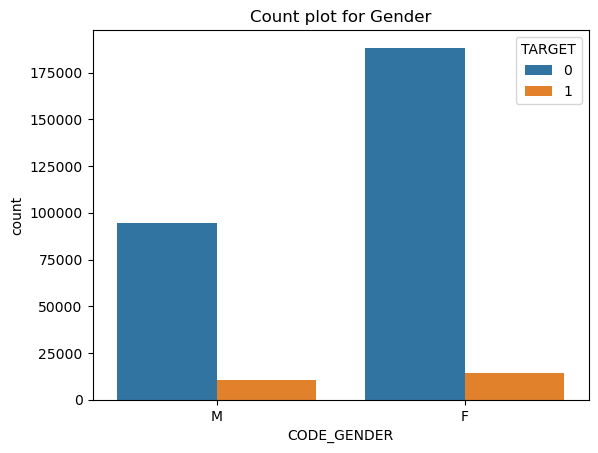

In [22]:
sns.countplot(data = df, x = 'CODE_GENDER', hue = 'TARGET')
plt.title('Count plot for Gender')
plt.show()

- Default rate of female customers is lower then Males.

## Preparing data for the analysis

In [23]:
# Creating bins for income amount

df['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.98, 0.99, 1])

0.10        81000.0
0.20        99000.0
0.30       112500.0
0.40       135000.0
0.50       147150.0
0.60       162000.0
0.70       180000.0
0.80       225000.0
0.90       270000.0
0.98       427500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

- Income column has a outlier so we need to cap or we can ignore it while bining.

In [24]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,
        300000,325000,350000,375000,400000,425000,450000,475000,500000]
range = ['0-25k', '25k-50k','50k-75k','75k-100k','100k-125k', '125k-150k','150k-175k',
        '175k-200k','200k-225k','225-250k','250k-275k','275k-300k','300k-325k',
        '325k-350k','350k-375k','375k-400k','400k-425k','425k-450k','450k-475k',
        '475k-500k']

df['INCOME_RANGE'] = pd.cut(df['AMT_INCOME_TOTAL'], bins, labels = range)

In [25]:
# Creating bins for Credit amount
df['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99, 1])

0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [26]:
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
range = ['0-150k', '150k-200k','200k-250k', '250k-300k', '300k-350k', '350k-400k','400k-450k',
        '450k-500k','500k-550k','550k-600k','600k-650k','650k-700k','700k-750k','750k-800k',
        '800k-850k','850k-900k','900k and above']

df['CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'], bins=bins,labels=range)

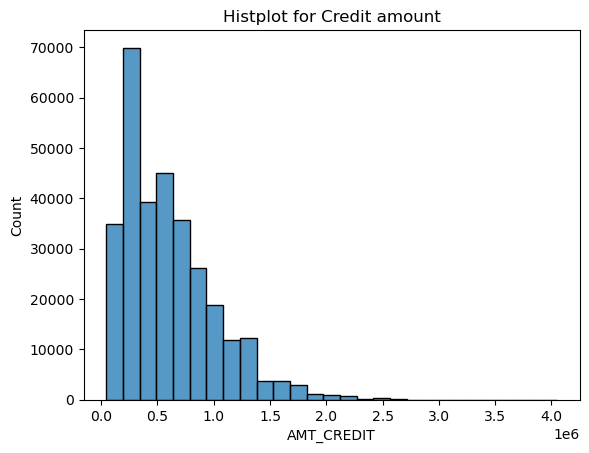

In [27]:
sns.histplot(x = df['AMT_CREDIT'], binwidth = 150000)
plt.title('Histplot for Credit amount')
plt.show()

In [28]:
# Creating bins for AMT_GOODS_PRICE

df['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99, 1])

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     373500.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [29]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
range = ['0-100K','100k-200K','200K-300K','300K-400K','400K-500K','500K-600K','600K-700K'
          ,'700K-800K','800K-900K','Above 900K']

df['AMT_GOODS_PRICE_RANGE'] = pd.cut(df['AMT_GOODS_PRICE'], bins = bins ,labels=range )

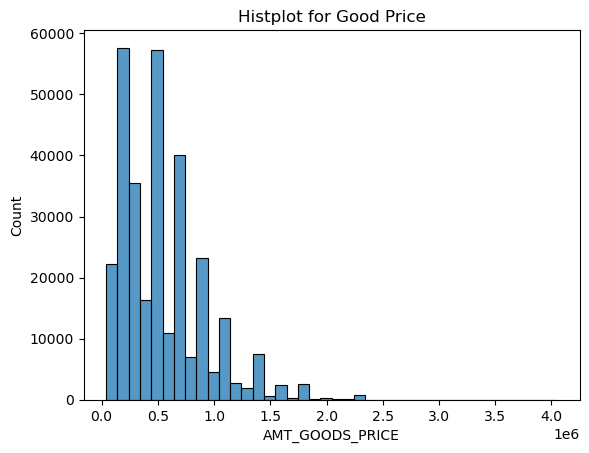

In [30]:
sns.histplot(x = df['AMT_GOODS_PRICE'], binwidth = 100000)
plt.title('Histplot for Good Price')
plt.show()

In [31]:
# Creating bins for AMT_ANNUITY

df['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99, 1])
#df['AMT_ANNUITY'].max()

0.10     11074.5
0.20     14701.5
0.30     18189.0
0.40     21870.0
0.50     24903.0
0.60     28062.0
0.70     32004.0
0.80     37516.5
0.90     45954.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

In [32]:
bins = [0,25000,50000,100000,150000,200000,258025.5]
range = ['0-25K','25K-50K','50K-100K','100K-150K','150K-200K','Above 200K']

df['AMT_ANNUITY_RANGE'] = pd.cut(df['AMT_ANNUITY'],bins,labels=range)

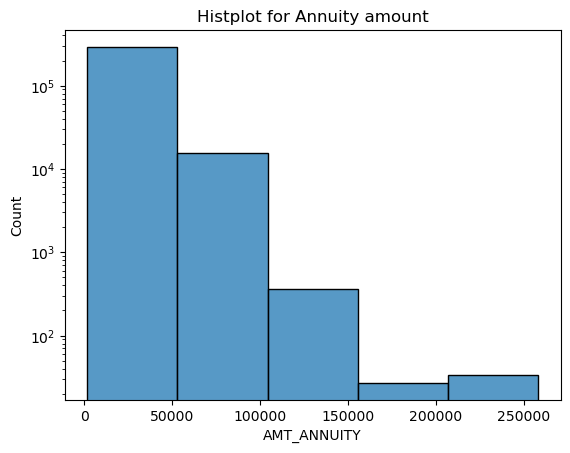

In [33]:
sns.histplot(x = df['AMT_ANNUITY'], binwidth = 50000)
plt.title('Histplot for Annuity amount')
plt.yscale('log')
plt.show()

In [34]:
# Making a list of all the columns which have documants data 

doc_col = []
for col in df.columns :
    if col.startswith('FLAG_DOC'):
        doc_col.append(col)

target_doc_col = df[doc_col + ['TARGET']]

In [35]:
target_doc_col.shape

(307511, 21)

In [36]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

non_defaulters = df.loc[df["TARGET"]==0]
defaulters = df.loc[df["TARGET"]==1]

In [37]:
# Calculating Imbalance percentage
    
round(len(non_defaulters)/len(defaulters),2)

11.39

In [38]:
len(non_defaulters)

282686

In [39]:
len(defaulters)

24825

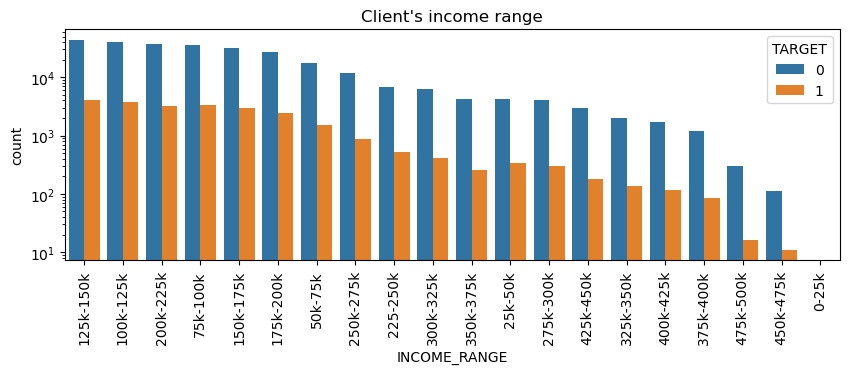

In [40]:

plt.figure(figsize=(10,3))
sns.countplot(data = df, x = 'INCOME_RANGE',
              order=df['INCOME_RANGE'].value_counts().index, 
              hue = df['TARGET']) 
plt.title("Client's income range")
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

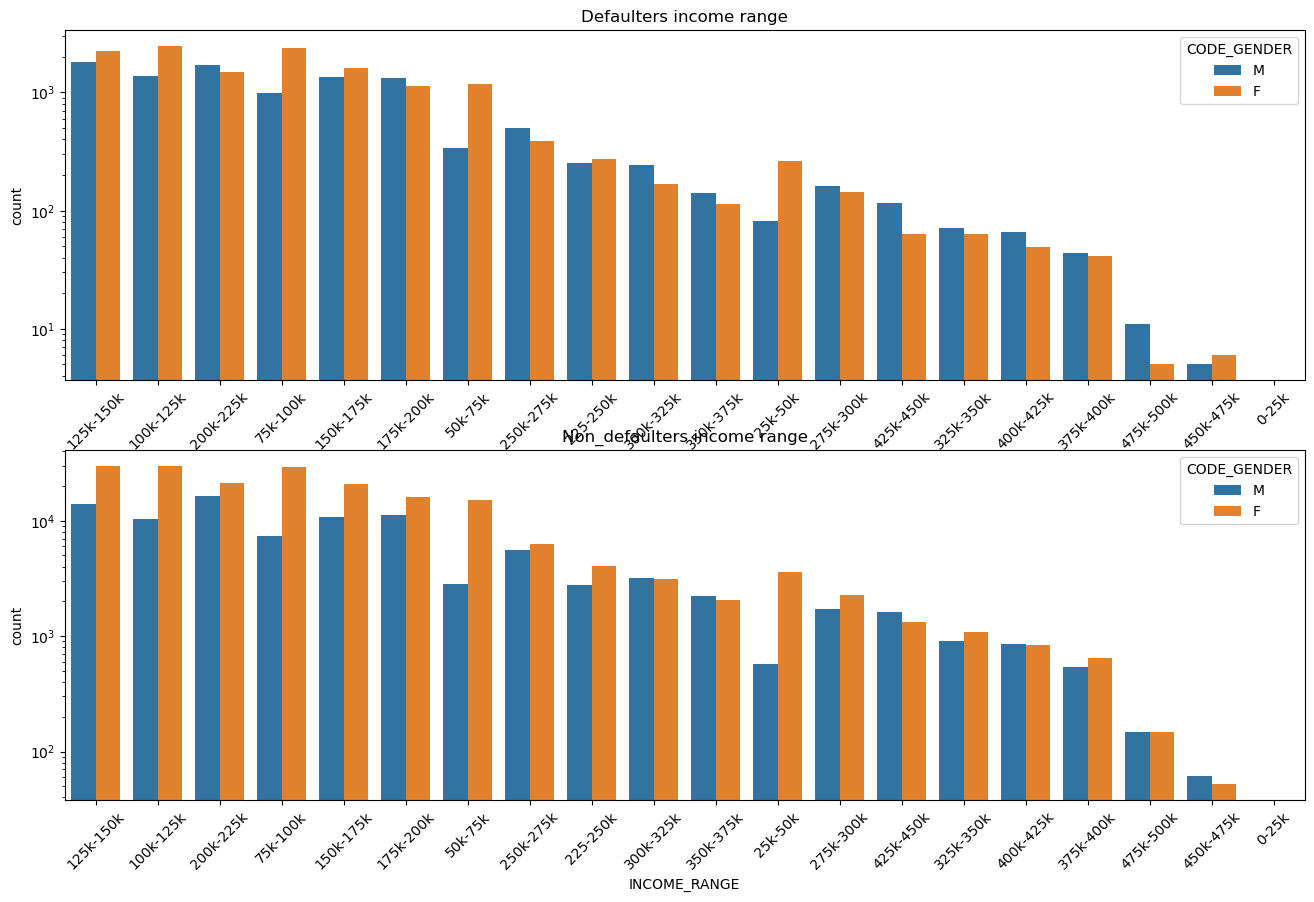

In [41]:
# Plot to see income range range by male, female and Target.

plt.figure(figsize = [16,10])
plt.subplot(2,1,1)
sns.countplot(data = defaulters, x = 'INCOME_RANGE',
              order=df['INCOME_RANGE'].value_counts().index, 
              hue = df['CODE_GENDER']) 
plt.title("Defaulters income range")
plt.yscale('log')
plt.xticks(rotation = 45)
plt.subplot(2,1,2)
sns.countplot(data = non_defaulters, x = 'INCOME_RANGE',
              order=df['INCOME_RANGE'].value_counts().index, 
              hue = df['CODE_GENDER']) 
plt.title("Non_defaulters income range")
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

1. Male counts are higher than female in Defaulters dataframe.
2. Female counts are higher than male in Non - defaulter dataframe.
3. This graph show that females are more than male in having credit for that range and safest to give loans.

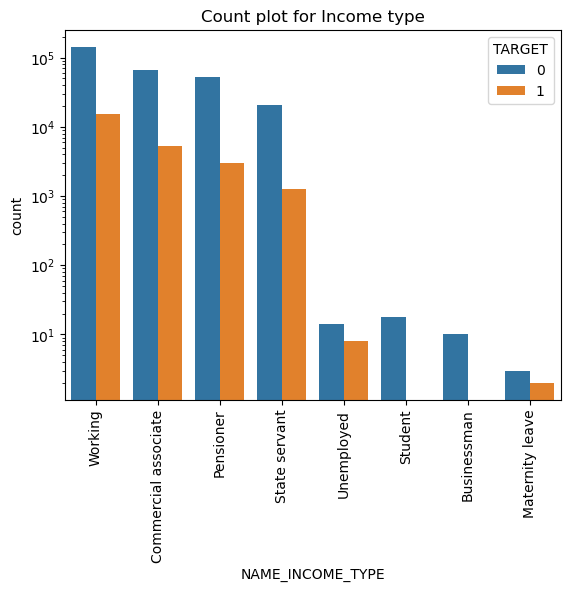

In [42]:
# Plotting for Income type for Non - Defaulters

sns.countplot(data = df, x ='NAME_INCOME_TYPE', 
              order=df['NAME_INCOME_TYPE'].value_counts().index, 
              hue='TARGET')
plt.title('Count plot for Income type')
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

1. Working, Commercial associates, pensioners and state servants are safest to give loans.
2. Unemployed and Maternity leave faced difficulty.

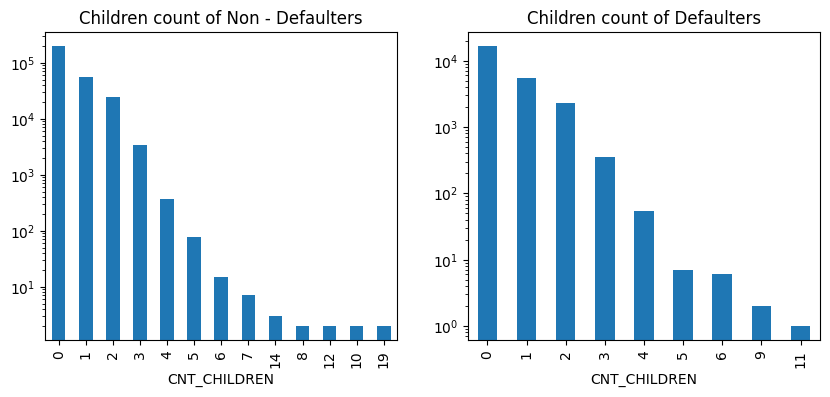

In [43]:
# Plotting for children count of Defaulters and Non - defaulters

plt.figure(figsize = [10,4])
plt.subplot(1,2,1)
non_defaulters['CNT_CHILDREN'].value_counts().plot.bar()
plt.title('Children count of Non - Defaulters')
plt.yscale('log')
plt.subplot(1,2,2)
defaulters['CNT_CHILDREN'].value_counts().plot.bar()
plt.title('Children count of Defaulters')
plt.yscale('log')
plt.show()

1. We can see that low child count maximizes that chances of both being a defaulter and also non defaulter.So we cannot conclude any specifics from this plot.

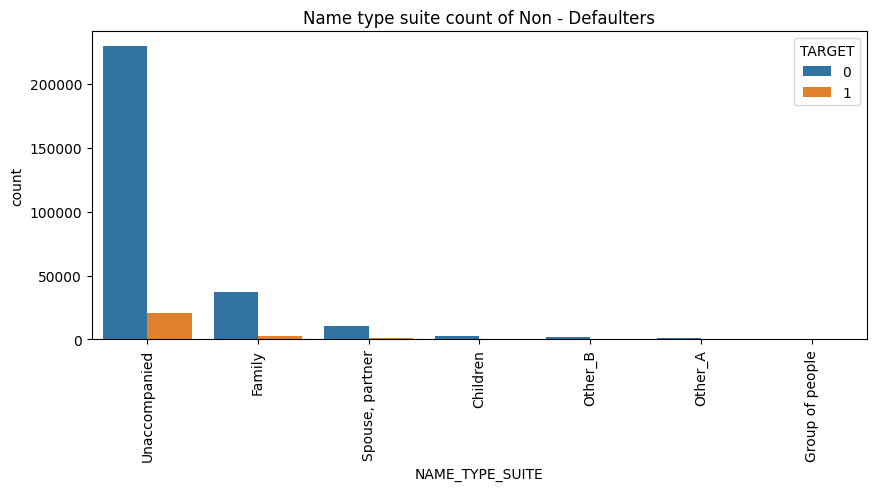

In [44]:
# Plotting for name type suite count of Defaulters and Non - defaulters

plt.figure(figsize = [10,4])
sns.countplot(data = df, x ='NAME_TYPE_SUITE', 
              order=df['NAME_TYPE_SUITE'].value_counts().index,
              hue = 'TARGET')
plt.title('Name type suite count of Non - Defaulters')
#plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

- Unaccompanied and family has taken more load and repayed the most.

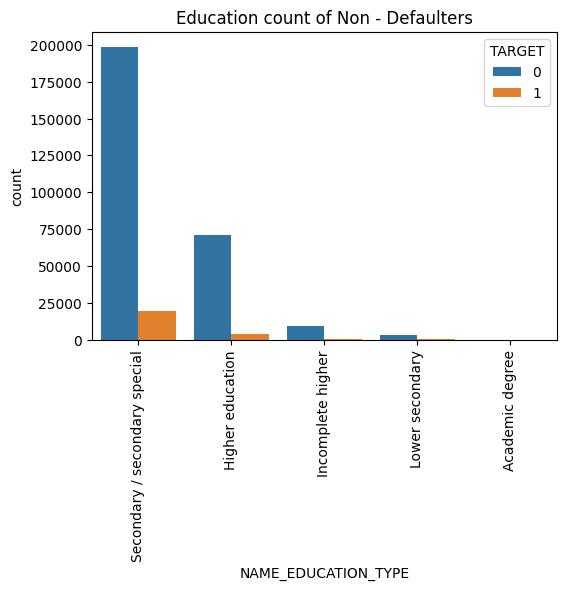

In [45]:
# Plotting for education type of Defaulters and Non - defaulters

plt.figure(figsize = [6,4])
sns.countplot(data = df, x ='NAME_EDUCATION_TYPE', 
              order=df['NAME_EDUCATION_TYPE'].value_counts().index,
              hue = 'TARGET')
plt.title('Education count of Non - Defaulters')
plt.xticks(rotation = 90)
plt.show()

- Higher education and secondary education are the safest segments.

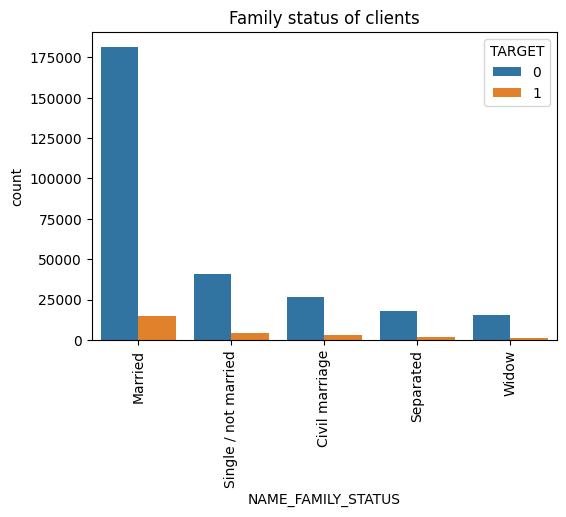

In [46]:
# Plotting for Family status of Defaulters and Non - defaulters

plt.figure(figsize = [6,4])
sns.countplot(data = df, x ='NAME_FAMILY_STATUS', 
              order=df['NAME_FAMILY_STATUS'].value_counts().index,
              hue = 'TARGET')
plt.title('Family status of clients')
plt.xticks(rotation = 90)
plt.show()

- Married people are safer to target.

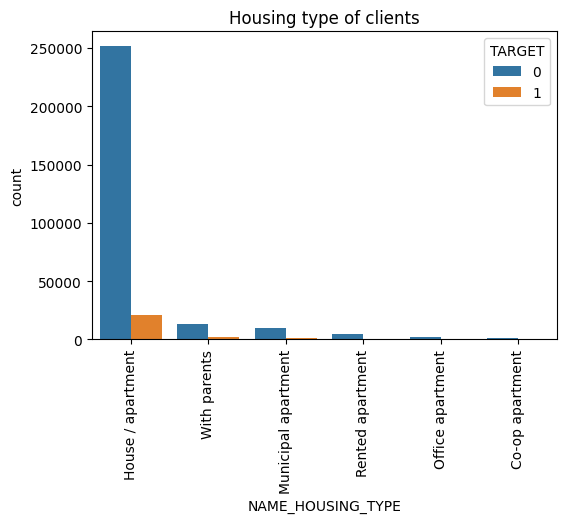

In [47]:
# Plotting for Housing type of Defaulters and Non - defaulters

plt.figure(figsize = [6,4])
sns.countplot(data = df, x ='NAME_HOUSING_TYPE', 
              order=df['NAME_HOUSING_TYPE'].value_counts().index,
              hue = 'TARGET')
plt.title('Housing type of clients')
plt.xticks(rotation = 90)
plt.show()

- People who has their own house or apartment are safest to target.

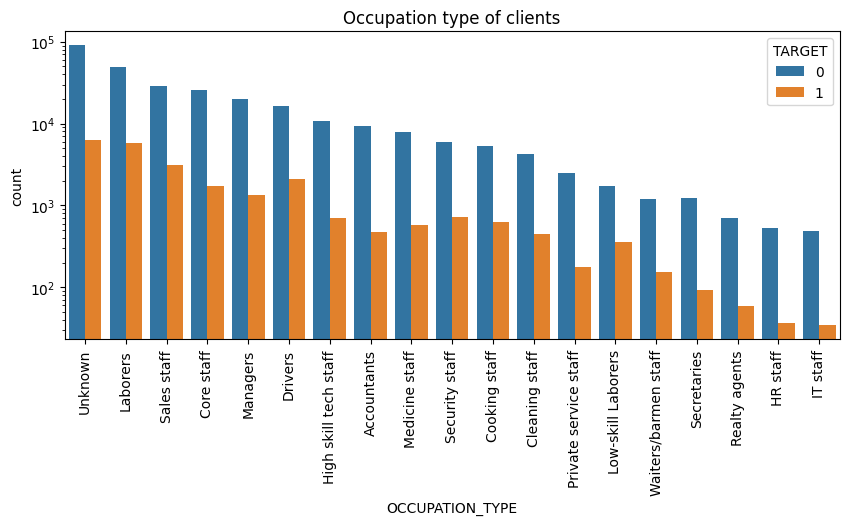

In [48]:
# Plotting for Occupation type of Defaulters and Non - defaulters

plt.figure(figsize = [10,4])
sns.countplot(data = df, x ='OCCUPATION_TYPE', 
              order=df['OCCUPATION_TYPE'].value_counts().index,
              hue = 'TARGET')
plt.title('Occupation type of clients')
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

- Laborers, Accountants are safest to give loans.
- Drivers and low skill labourers are most defaulters.

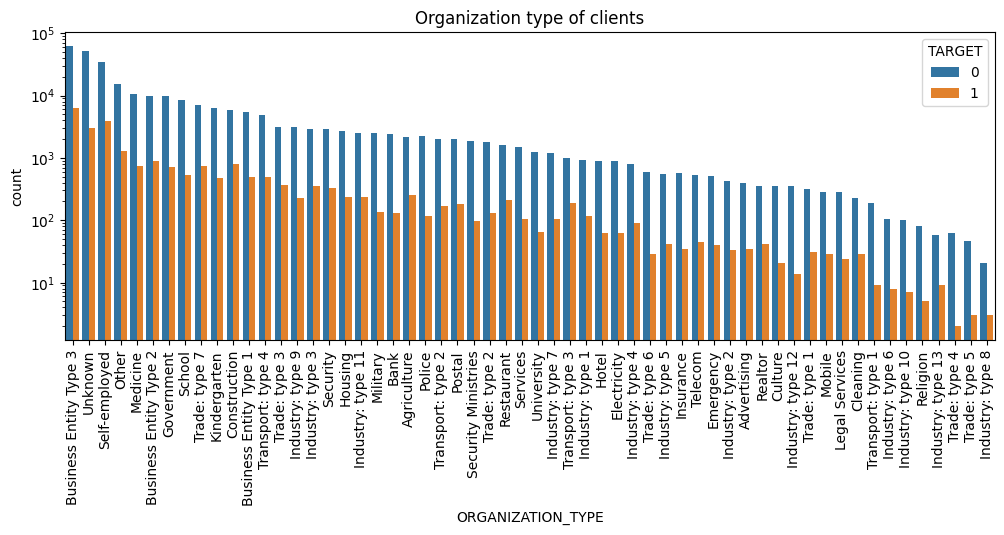

In [49]:
# Plotting for Organization type of Defaulters and Non - defaulters

plt.figure(figsize = [12,4])
sns.countplot(data = df, x ='ORGANIZATION_TYPE', 
              order=df['ORGANIZATION_TYPE'].value_counts().index,
              hue = 'TARGET')
plt.title('Organization type of clients')
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

- Business Entity Type 3 and self employed are the highest in having loans from the bank. 
- Transprtation Type 3 are the highest in default rate.

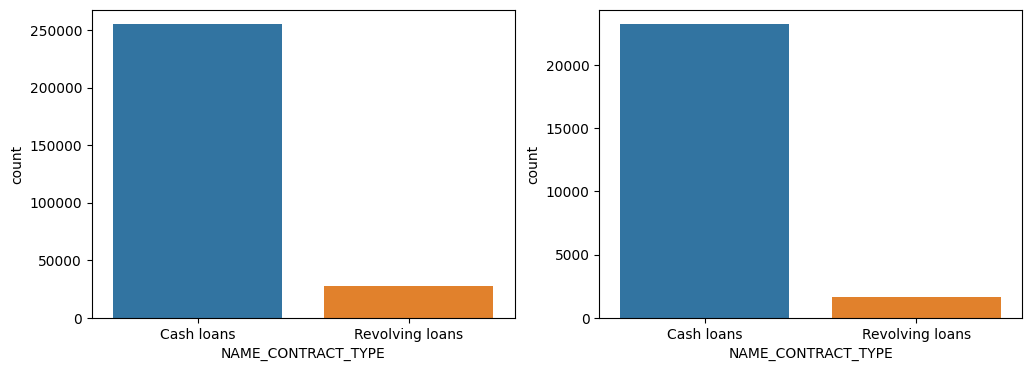

In [50]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
sns.countplot(data = non_defaulters, x = 'NAME_CONTRACT_TYPE',order=df['NAME_CONTRACT_TYPE'].value_counts().index)
plt.title('')

plt.subplot(1,2,2)
sns.countplot(data = defaulters, x = 'NAME_CONTRACT_TYPE',order=df['NAME_CONTRACT_TYPE'].value_counts().index)

plt.show()

1. Most of the customers has Cash loan.
2. Customers who have taken cash loan are most likely to default.

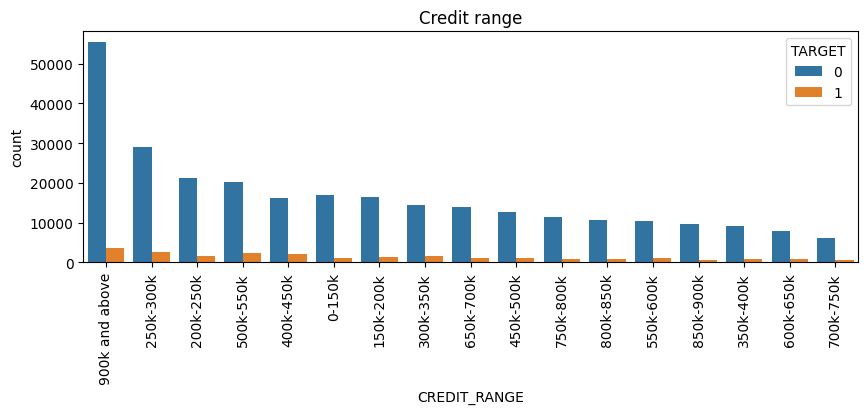

In [51]:
# Count plot for Credit data

plt.figure(figsize=(10,3))
sns.countplot(data = df, x = 'CREDIT_RANGE',order=df['CREDIT_RANGE'].value_counts().index, hue = df['TARGET']) 
plt.title("Credit range")
#plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

- Most of the clients has the income in 9 million and above.

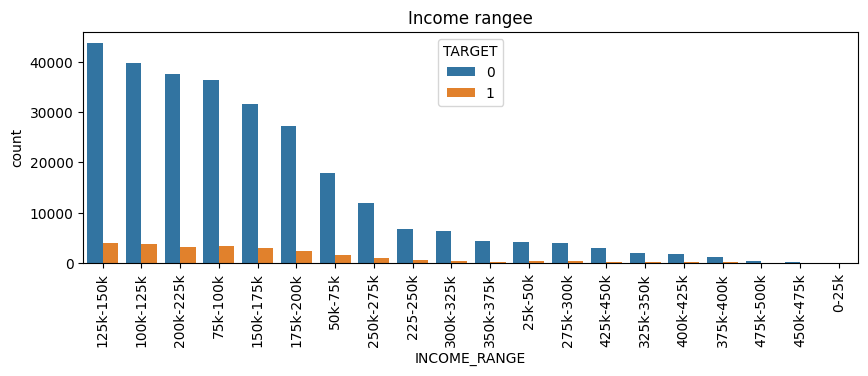

In [52]:
#Count plot for Income range

plt.figure(figsize=(10,3))
sns.countplot(data = df, x = 'INCOME_RANGE',order=df['INCOME_RANGE'].value_counts().index, hue = df['TARGET']) 
plt.title("Income rangee")
plt.xticks(rotation = 90)
plt.show()

- The income range is highest in range 125k - 150k.

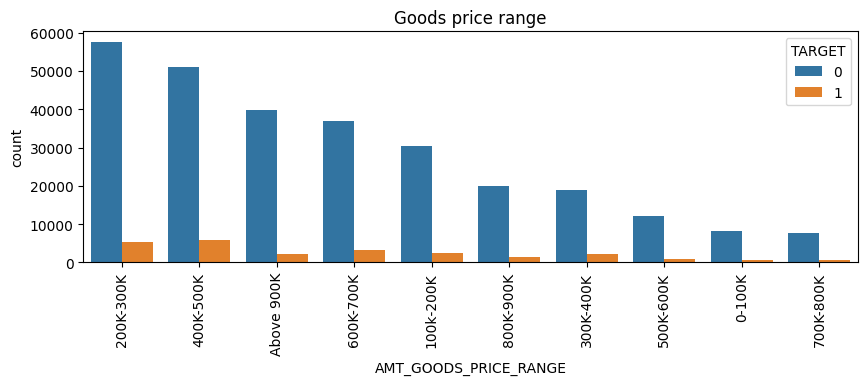

In [53]:
#Count plot for Goods price range

plt.figure(figsize=(10,3))
sns.countplot(data = df, x = 'AMT_GOODS_PRICE_RANGE',order=df['AMT_GOODS_PRICE_RANGE'].value_counts().index, hue = df['TARGET']) 
plt.title("Goods price range")
plt.xticks(rotation = 90)
plt.show()

- Most of the goods price is high in between the range 200k - 300k and 400k - 500k.

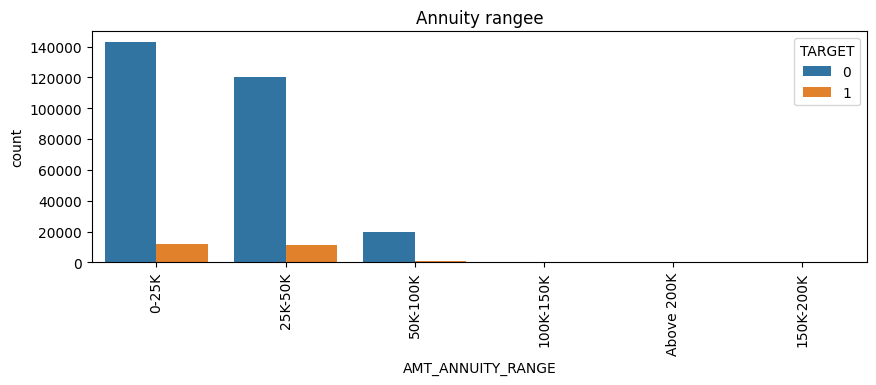

In [54]:
#Count plot for Annuity range

plt.figure(figsize=(10,3))
sns.countplot(data = df, x = 'AMT_ANNUITY_RANGE',
              order=df['AMT_ANNUITY_RANGE'].value_counts().index, 
              hue = df['TARGET']) 
plt.title("Annuity rangee")
plt.xticks(rotation = 90)
plt.show()

- The annuity range is high between 0 to 50k

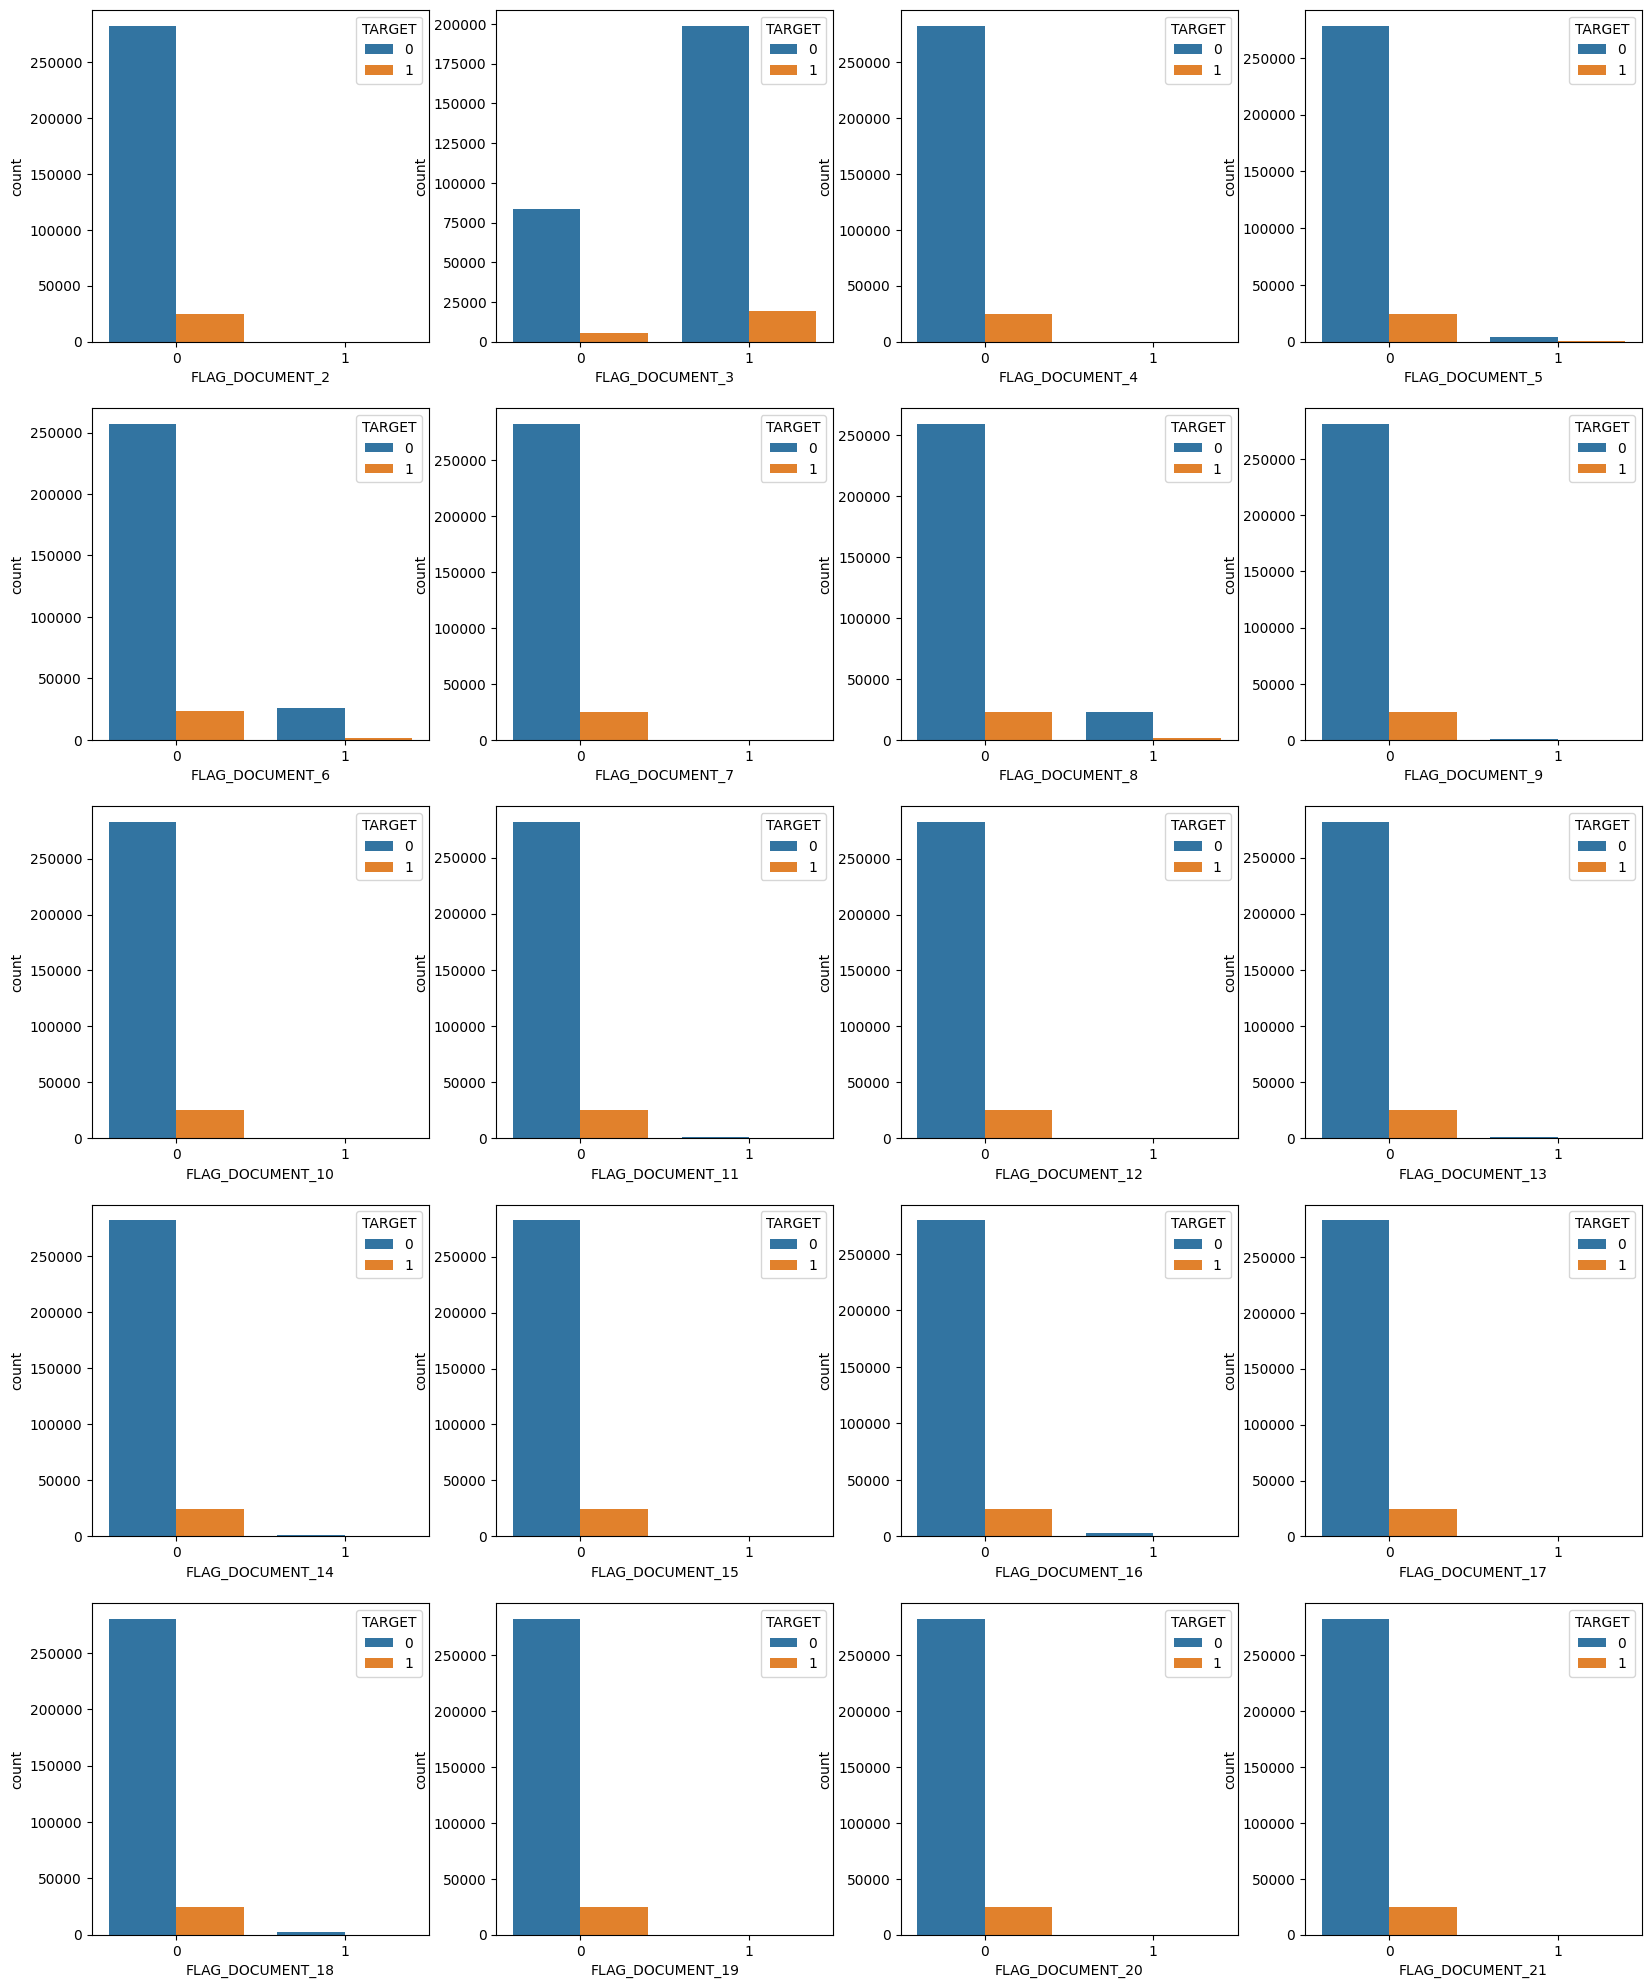

In [55]:
# Subplot to see the imporance of each document and there relationshp with Target variable.

plt.figure(figsize=(20,25))
for i, col in enumerate(doc_col) :
    plt.subplot(5,4, i+1)
    sns.countplot(data = target_doc_col, x = col, hue ='TARGET')

1. Except Document 3 almost no other document is submitted by the customer.
2. In the above subplot we observe that there is no relation between flag document columns and target variable so we can delete them.

In [56]:
df.drop(doc_col, axis = 1, inplace = True)

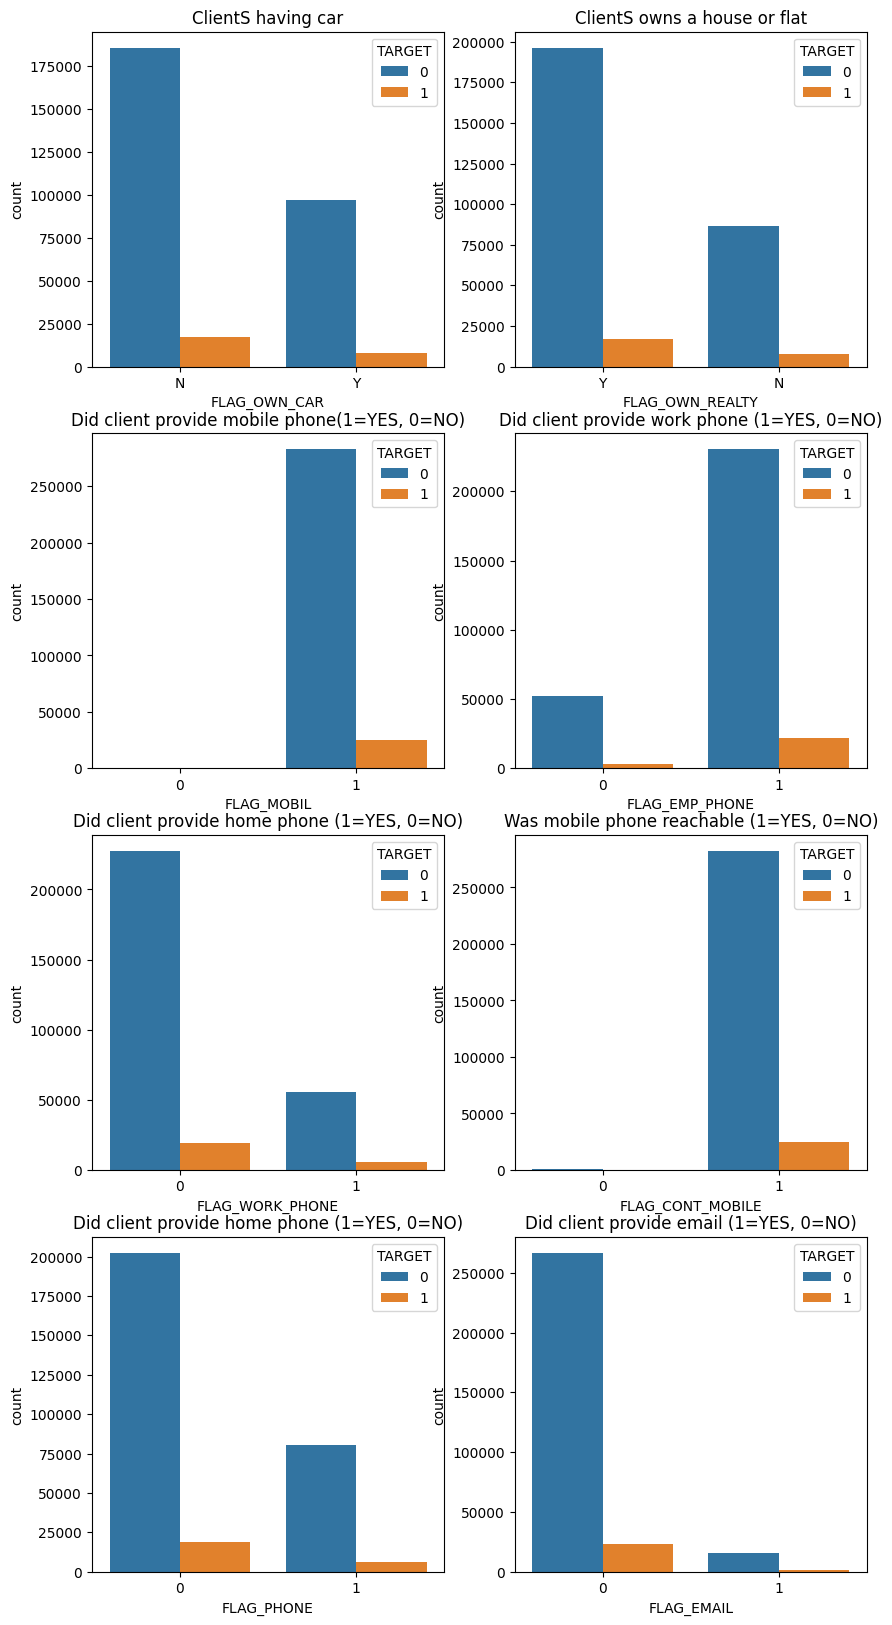

In [57]:
plt.figure(figsize = [10,20])
plt.subplot(4,2,1)
sns.countplot(data = df, x = 'FLAG_OWN_CAR', hue ='TARGET')
plt.title('ClientS having car')

plt.subplot(4,2,2)
sns.countplot(data = df, x = 'FLAG_OWN_REALTY', hue ='TARGET')
plt.title('ClientS owns a house or flat')

plt.subplot(4,2,3)
sns.countplot(data = df, x = 'FLAG_MOBIL', hue ='TARGET')
plt.title('Did client provide mobile phone(1=YES, 0=NO)')

plt.subplot(4,2,4)
sns.countplot(data = df, x = 'FLAG_EMP_PHONE', hue ='TARGET')
plt.title('Did client provide work phone (1=YES, 0=NO)')

plt.subplot(4,2,5)
sns.countplot(data = df, x = 'FLAG_WORK_PHONE', hue ='TARGET')
plt.title('Did client provide home phone (1=YES, 0=NO)')

plt.subplot(4,2,6)
sns.countplot(data = df, x = 'FLAG_CONT_MOBILE', hue ='TARGET')
plt.title('Was mobile phone reachable (1=YES, 0=NO)')

plt.subplot(4,2,7)
sns.countplot(data = df, x = 'FLAG_PHONE', hue ='TARGET')
plt.title('Did client provide home phone (1=YES, 0=NO)')

plt.subplot(4,2,8)
sns.countplot(data = df, x = 'FLAG_EMAIL', hue ='TARGET')
plt.title('Did client provide email (1=YES, 0=NO)')

plt.show()

- In the above subplot we observe that there is no relation between flag columns and target variable so we can delete them.

In [58]:
df.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_OWN_CAR',
         'FLAG_OWN_REALTY'], inplace = True, axis = 1)

In [59]:
df[[ 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']].corr()

,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
EXT_SOURCE_2,1.000000,0.109167,-0.160472
EXT_SOURCE_3,0.109167,1.000000,-0.178919
TARGET,-0.160472,-0.178919,1.000000


- Target variable has very less relation with external source column. So we can drop them.

In [60]:
df.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'], axis = 1, inplace = True)

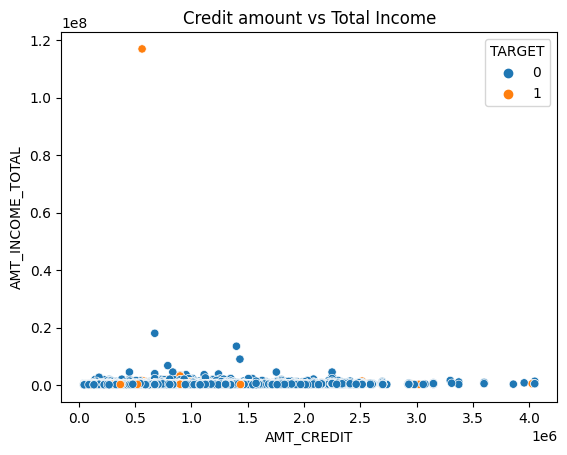

In [61]:
sns.scatterplot(data=df,x='AMT_CREDIT',y='AMT_INCOME_TOTAL',hue='TARGET')
plt.title('Credit amount vs Total Income')
plt.show()

- Almost all client's income is below 1 million and the chances of default are hire when the credit amount is less the 1.5 million.

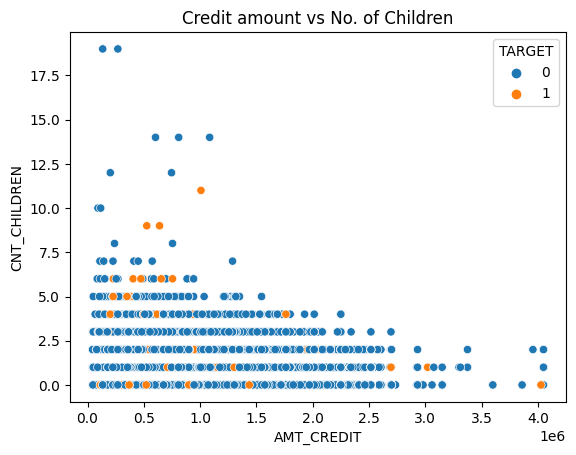

In [62]:
sns.scatterplot(data=df,x='AMT_CREDIT',y='CNT_CHILDREN',hue='TARGET')
plt.title('Credit amount vs No. of Children')
plt.show()

- Clients who have 0-5 children are safer to give loan.

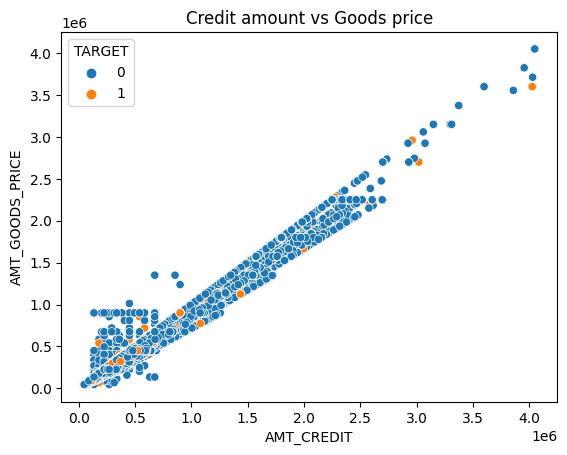

In [63]:
sns.scatterplot(data=df,x='AMT_CREDIT',y='AMT_GOODS_PRICE',hue='TARGET')
plt.title('Credit amount vs Goods price')
plt.show()

- Most of the defaulters are lying in the range of 0 to 1 million credit amount.

## Analysis on variables having amount

In [64]:
amt_col = df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]

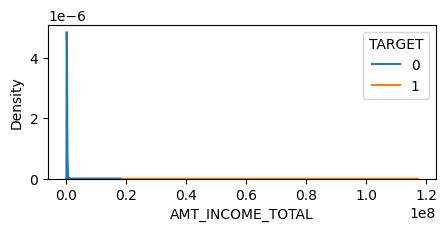

In [65]:
# Analysis on income of client 

plt.figure(figsize=(5,2))
sns.kdeplot(data=df,x='AMT_INCOME_TOTAL',hue='TARGET')
plt.show()

- Most of the clients have income between 1 to 2 million.

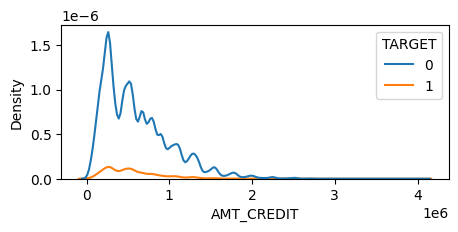

In [66]:
# Analysis on credit of client 

plt.figure(figsize=(5,2))
sns.kdeplot(data=df,x='AMT_CREDIT',hue='TARGET')
plt.show()

- Most of the loan were given for the amount of 0 to 1million.

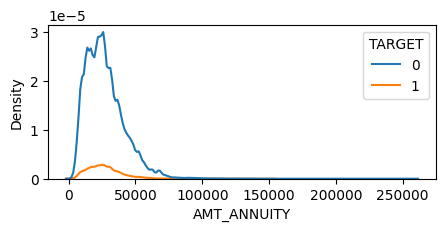

In [67]:
# Analysis on Annuity of client

plt.figure(figsize=(5,2))
sns.kdeplot(data=df,x='AMT_ANNUITY',hue='TARGET')
plt.show()

- Most of the clients are paying annuity between 0 to 1Lakh

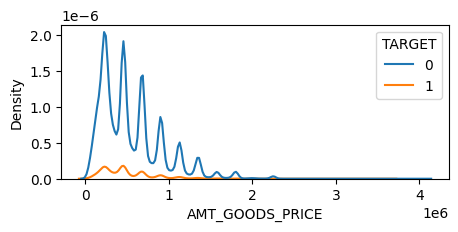

In [68]:
# Analysis on goods price of client

plt.figure(figsize=(5,2))
sns.kdeplot(data=df,x='AMT_GOODS_PRICE',hue='TARGET')
plt.show()

- Most of the clients have taken loan for goods prie ranging 0 to 2 million.

### We can also make pair plot to see the relationship between these variables.

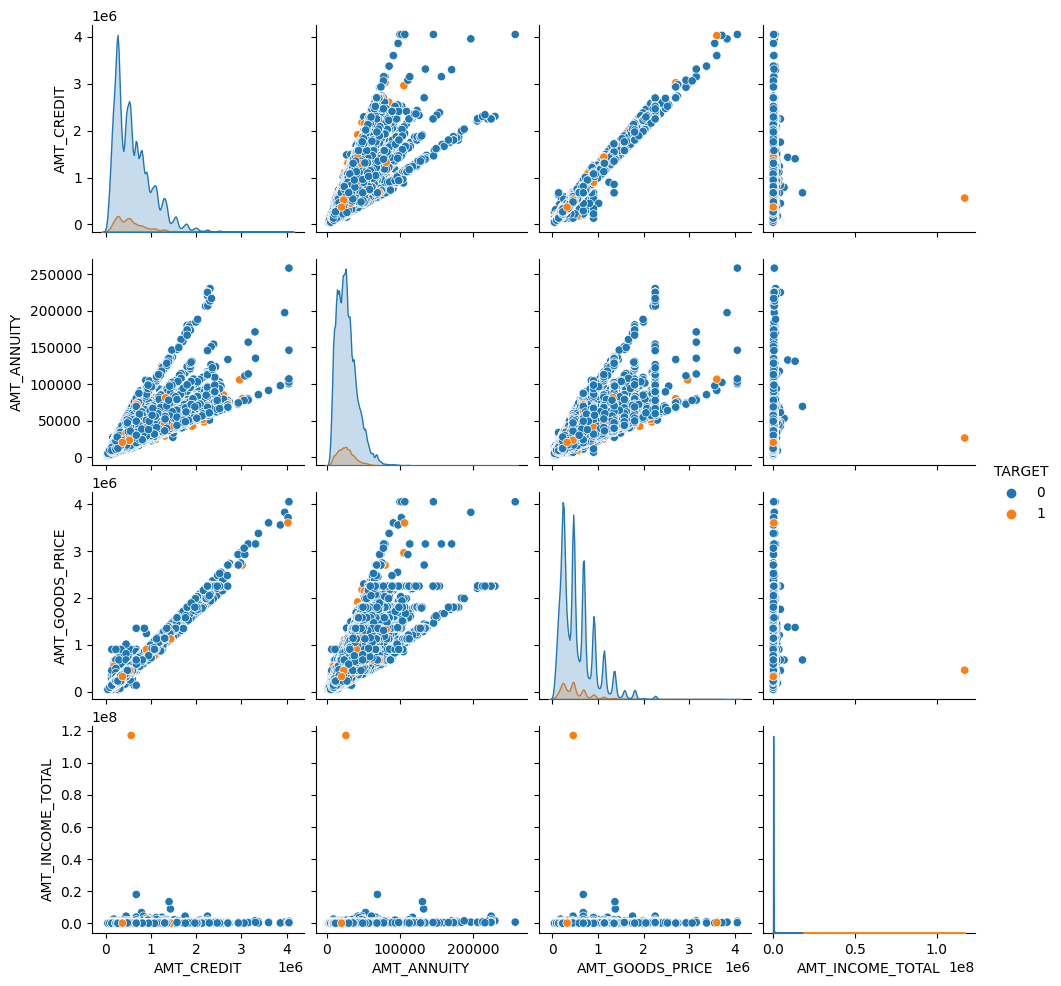

In [69]:
sns.pairplot(data= df, vars = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_INCOME_TOTAL',], hue = 'TARGET')

plt.show()

# Conclusion

1. Default rate of female customers is lower then Males.
2. Females are more than male in having credits for that range.
3. Working, Commercial associates, pensioners and state servants are safest to give loans.
4. Unemployed and Maternity leave segments faced difficulty in repaying the loan.
5. Unaccompanied and family has taken more load and repayed the most.
6. Higher education and secondary education are the safest segments.
7. Married people are safer to target.
8. People who has their own house or apartment are safest to target.
9. Laborers, Accountants are safest to give loans.
10. Drivers and low skill labourers are most defaulters.
11. Business Entity Type 3 and self employed are the highest in having loans from the bank. 
12. Transprtation Type 3 are the highest in default rate.
13. Most of the customers has Cash loan.
14. Customers who have taken cash loan are most likely to default.
15. Most of the clients have income between 1 to 2 million.
16. Most of the loan were given for the amount of 0 to 1 million.
17. Most of the clients are paying annuity between 0 to 1Lakh.
18. Most of the clients have taken loan for goods prie ranging 0 to 2 million.
19. Most of the defaulters are lying in the range of 0 to 1 million credit amount.
20. Almost all client's income is below 1 million and the chances of default are hire when the credit amount is less the 1.5 million. 
21. Clients who have 0-5 children are safer to give loan.